#**Understanding Recurrent Neural Networks (Using Tensorflow)**

RNN are generally suited for tasks which require previous 'context' to make future predictions.

Problems where the sequence or order of the events is really important for predicting the next event are usually tackled by Recurrent Neural Networks or RNN.

USES of RNN: Speech recognition, language translation, stock market price prediction, music generation etc.

Types of input and output sequences supported by RNN:
1. Sequence to sequence (useful for time series analysis)
2. Sequence to Vector (useful for sentiment scores)
3. Vector to sequence (useful for image description)
4. Delayed sequence to sequence 

I have divided this tutorial into 4 parts:

Part1: We will create a basic Recurrent Neural Network

Part2: We will understand Static unrolling through time

Part3: We will understand dynamic unrolling through time

Part4: Finally we will create a RNN to predict output one step in future using a data set created randomly

But first, we will mount the Google Drive, create a new directory and install the dependencies, mainly Tensorflow (1.14).

In [32]:
import os
from google.colab import drive

In [33]:
#mounting google drive
drive.mount ('/content/abc')

Drive already mounted at /content/abc; to attempt to forcibly remount, call drive.mount("/content/abc", force_remount=True).


In [34]:
os.chdir('/content/sample_data')

In [35]:
mkdir rnn1

mkdir: cannot create directory ‘rnn1’: File exists


In [36]:
cd rnn1

/content/sample_data/rnn1


In [ ]:
pip install tensorflow==1.14

In [37]:
pwd

'/content/sample_data/rnn1'

In [38]:
import numpy as np

In [39]:
import tensorflow as tf

**Creating a basic RNN:**

Suppose we have a RNN with just one neuron. At each time step t , this recurrent neuron receives the inputs x(t) as well as its own output from the previous time step, y(t–1). 

Each recurrent neuron has two set of weights, one for the input x(t)and another one for the output y(t-1) from the previous time step.

A single recurrent neuron (or a layer of recurrent neurons) is a very basic *cell*. In the case of the basic cell we are going to discuss, the
output is simply equal to the state, but in more complex cells this is not always the case. 

In the below mentioned basic implementation of RNN, we are not using any Tensorflow's RNN operation. Here we are taking an RNN composed of a layer of 5 recurrent neurons, the RNN runs only for two time steps, taking an input feature vector of length 3 at every time step. The activation function that we are using is Tanh. 




In [40]:
#Creating the graph for RNN from scratch
n_inputs=3 #input feature vector of size 3
n_neurons=5 # number of recurrent neurons

In [41]:
X0 = tf.placeholder(tf.float32, [None, n_inputs]) # a place holder for feature vector at time t=0
X1 = tf.placeholder(tf.float32, [None, n_inputs]) # a placeholder for feature vector at time t=1

In [42]:
#declaring the weight and bias variables and same weights and bias are shard by both the layers
Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons],dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons,n_neurons],dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

In [43]:
#Using the tanh activation function
Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)# the output from the layer at t=0 is fed as an input at t=1

In [44]:
init = tf.global_variables_initializer() #initilizing the variables

In [46]:
#EXECUTION
import numpy as np
# Mini-batch:        instance 0,instance 1,instance 2,instance 3
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1
with tf.Session() as sess:
  init.run()
  Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0: X0_batch, X1: X1_batch})
 

In [47]:
#Printing output of the network at t=0 time step
print(Y0_val) 

[[-0.83499384  0.24517247 -0.3175346   0.9090766  -0.99879515]
 [-0.46458378 -0.999999   -0.9734532   0.50397605 -1.        ]
 [ 0.19557235 -1.         -0.9993015  -0.3909621  -1.        ]
 [ 1.         -1.         -0.99735075 -1.         -0.99999934]]


In [48]:
#Printing output of the network at t=0 time step
print(Y1_val)

[[ 0.96480036 -1.         -0.99999624 -0.9995012  -1.        ]
 [-0.34435102 -0.08271855  0.05902134 -0.17227595  0.9225421 ]
 [ 0.9857133  -1.         -0.99145603 -0.994587   -1.        ]
 [ 0.96987844 -0.9999985  -0.38697344 -0.9013631  -0.99991846]]


The above example explains just the basic concept and it is not very feasible practically as you have to declare input placeholders at each time step, the output placeholders and the respective cell calculation. We can create the same model using Tensorflow's RNN operations.

**Static unrolling through time** 

The static_rnn() function creates an unrolled RNN network by chaining cells. 

Syntax:

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)

output_seqs, states = tf.contrib.rnn.static_rnn(
        basic_cell, X , dtype=tf.float32)

Here, n_neurons is number of neuron in each cell, and X is the input tensor.
The static_rnn() function returns
two objects. The first is a Python list containing the output tensors for each time step. The second is a tensor containing the final states of the network. When you are using basic cells, the final state is simply equal to the last output.



In [68]:
tf.reset_default_graph()

In [69]:
n_steps=2 #declaring number of steps

In [ ]:
X_1 = tf.placeholder(tf.float32, [None, n_steps, n_inputs]) #single placeholder of shape [None, n_steps, n_inputs], here the first dimension is the mini batch size
X_seqs = tf.unstack(tf.transpose(X_1, perm=[1, 0, 2])) # see 'Note'
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)#Declare the number of neurons for a sinle RNN cells
output_seqs, states = tf.contrib.rnn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1, 0, 2])

"""
Note:
Here the RNN will takes a single input placeholder of shape [None, n_steps, n_inputs] 
where the first dimension is the mini-batch size(denoted by None). Then it extracts 
the list of input sequences for each time step. X_seqs is a Python list of n_steps 
tensors of shape [None, n_inputs], where once again the first dimension is the mini-batch size.
To do this, we first swap the first two dimensions using the transpose() function, 
so that the time steps are now the first dimension. Then we extract a Python list 
of tensors along the first dimension (i.e., one tensor per time step) using the unstack() function. 
Finally, we merge all the output tensors into a single tensor using the
stack() function, and we swap the first two dimensions to get a final outputs tensor
of shape [None, n_steps, n_neurons] (again the first dimension is the mini-batch
size).
"""


In [71]:
#Feeding an single tensor: batch of 4, number of steps=2 and input feature vector size=3
X_batch = np.array([
                    # t = 0     t = 1
                    [[0, 1, 2], [9, 8, 7]], # instance 0
                    [[3, 4, 5], [0, 0, 0]], # instance 1
                    [[6, 7, 8], [6, 5, 4]], # instance 2
                    [[9, 0, 1], [3, 2, 1]], # instance 3
                    ])


In [72]:
X_batch.shape # checking the shape of X_batch

(4, 2, 3)

In [73]:
init1 = tf.global_variables_initializer() #initilizing the variables

In [74]:
#EXECUTION:
with tf.Session() as sess:
  init1.run()
  outputs_val = outputs.eval(feed_dict={X_1: X_batch})

In [75]:
#Here is the output for each each iteration, each step, and all neurons
print (outputs_val)

[[[-0.8436423  -0.2649301   0.8435884  -0.5788201  -0.79372996]
  [-0.9959689   0.8765341   1.         -0.31685385 -0.63717246]]

 [[-0.99085104  0.22204585  0.9999338  -0.7543069  -0.8608555 ]
  [-0.28061047 -0.48123798 -0.85178286 -0.3478616  -0.84814835]]

 [[-0.9995021   0.61877495  1.         -0.86301994 -0.9072661 ]
  [-0.9805267   0.5748377   0.9999386  -0.53795743 -0.46237117]]

 [[ 0.99740344  0.99982435  0.9999622  -0.58008516  0.9900611 ]
  [-0.11982673  0.96803933  0.98312575 -0.38467655  0.8447213 ]]]


The static_rnn() function still creates a graph with a  cell for each time step, which can consume a lot of memory if the dataset is too large as the graph will get very big.

Fortunately we have a better option.

**Dynamic Unrolling Through Time**

dynamic_rnn() functions utilizes the while_loop() operation to run over the cell the appropriate number of times. Also there is no need to stack(), unstack(), or transpose() as we did in static_rnn().

It requires input of the shape [None, n_steps, n_inputs] and provides output of the shape [None, n_steps, n_neurons].



In [76]:
tf.reset_default_graph()

In [77]:
#Placeholder for input tensor
X_2 = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X_2, dtype=tf.float32)#Dynamic_rnn

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API


In [78]:
init3 = tf.global_variables_initializer() #initilizing the variables

In [80]:
#EXECUTION
with tf.Session() as sess1:
  init3.run()
  outputs_val = outputs.eval(feed_dict={X_2: X_batch})

In [81]:
print(outputs_val)

[[[-0.7474698  -0.3858245   0.9194507  -0.79767597 -0.74641675]
  [-0.99998975 -0.99999696  0.98422736  0.37594968 -0.63690674]]

 [[-0.9981782  -0.98752016  0.99448746 -0.9065597  -0.90608793]
  [ 0.5880843  -0.8364257  -0.28693894  0.6155394  -0.2958013 ]]

 [[-0.99998844 -0.9998221   0.9996358  -0.9582083  -0.96711373]
  [-0.9978003  -0.9999169   0.69242346  0.75910866 -0.37223786]]

 [[-0.97489166 -0.999383   -0.9999343   0.9996996   0.99800324]
  [-0.8714712  -0.99199444 -0.82703465  0.56185526 -0.05533716]]]


Now since we have a basic understanding of how an RNN works and how code can be written in tensorflow we now move ahead and create an RNN on a dummy data set to predict a value one time-step ahead in future.

First we create a dummy data sets.




In [90]:
#Creating a dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=np.linspace(1,10,120)

In [91]:
data

array([ 1.        ,  1.07563025,  1.1512605 ,  1.22689076,  1.30252101,
        1.37815126,  1.45378151,  1.52941176,  1.60504202,  1.68067227,
        1.75630252,  1.83193277,  1.90756303,  1.98319328,  2.05882353,
        2.13445378,  2.21008403,  2.28571429,  2.36134454,  2.43697479,
        2.51260504,  2.58823529,  2.66386555,  2.7394958 ,  2.81512605,
        2.8907563 ,  2.96638655,  3.04201681,  3.11764706,  3.19327731,
        3.26890756,  3.34453782,  3.42016807,  3.49579832,  3.57142857,
        3.64705882,  3.72268908,  3.79831933,  3.87394958,  3.94957983,
        4.02521008,  4.10084034,  4.17647059,  4.25210084,  4.32773109,
        4.40336134,  4.4789916 ,  4.55462185,  4.6302521 ,  4.70588235,
        4.78151261,  4.85714286,  4.93277311,  5.00840336,  5.08403361,
        5.15966387,  5.23529412,  5.31092437,  5.38655462,  5.46218487,
        5.53781513,  5.61344538,  5.68907563,  5.76470588,  5.84033613,
        5.91596639,  5.99159664,  6.06722689,  6.14285714,  6.21

In [92]:
data_sin=np.sin(data)

So, data_sin is our dataset that we will use for analyzing the working of the RNN.

Here is how it looks when we plot it using Matplotlib library.

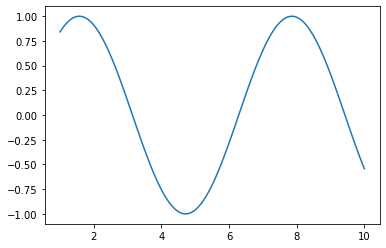

In [93]:
plt.plot(data,data_sin)

Now lets create a simple function to get us multiple randomly selected instances from the data set we created above. These instances are a randomly selected sequence of 20 consecutive values from the data, and the target (Y_batch) sequence is the same as the input sequence (X_batch), except it is shifted by one time step into
the future. 

In [94]:
#creating a function to return random X_batch and Y_batch
import random
def ret_x_y():
  ran=random.choice(data_sin[:-20])
  itemindex = np.where(data_sin==ran)
  X_batch = data_sin[itemindex[0][0]:itemindex[0][0]+20].reshape((1,20,1))
  Y_batch = data_sin[itemindex[0][0]+1:(itemindex[0][0]+1)+20].reshape((1,20,1))
  return X_batch,Y_batch

We will also create a new data instance that we can use to predict using our RNN model and compare the result.

In [102]:
X_new=data[47:(47+20)]
X_new_sin=np.sin(X_new)

In [103]:
X_new_sin=X_new_sin.reshape(1,20,1)

**Training to predict a time series**

Let's now create the RNN architecture that we are going to use. We are basically trying to predict value one time step ahead in the future, for this we will train out RNN with multiple instances of data. Each instance will have data points from 20 contineous steps. Here, the input will have a shape [None, 20,1], since the input feature vector contains only one value. Also, we will get one output per time step corresponding to the input value.

In [95]:
tf.reset_default_graph()

In [96]:
n_steps=20 #number of steps 
n_neurons=100
n_inputs=1 #single input
n_output=1 #single output

In [97]:
#placeholders
X=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
Y=tf.placeholder(tf.float32,[None,n_steps,n_output])


In [ ]:
#OutputProjectionWrapper
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),output_size=n_output)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

"""
Note: Here we are using OutputProjectionWrapper because we actually want a single output value at each time 
steps otherwise we will get an output vector of size 100 at each time step.
"""

Now we will declare the Optimizer and the Loss function.

In [99]:
#Cost function and Optimizer
learning_rate=0.001

loss = tf.reduce_mean(tf.square(outputs - Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [100]:
#initilizing the variables
init4 = tf.global_variables_initializer()

In [ ]:
#EXCUTION PHASE
n_iterations =5000
#batch_size = 50

with tf.Session() as sess:
  init4.run()
  for iteration in range(n_iterations):
    X_batch, Y_batch = ret_x_y() # fetch the next training batch
    sess.run(training_op, feed_dict={X: X_batch, Y: Y_batch})
    mse = loss.eval(feed_dict={X: X_batch, Y: Y_batch})
    print(iteration, "\tMSE:", mse)
  y_pred = sess.run(outputs, feed_dict={X: X_new_sin})  



So, we trained our RNN on 5000 instances of the data set and also predicted values for a data instance we created earlier. The graph below shows the predicted sequence.

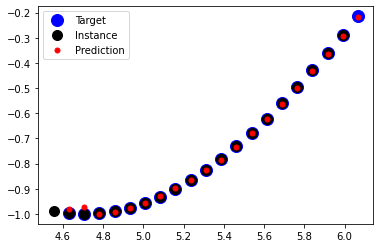

In [147]:
plt.plot(data[48:68],np.sin(data[48:68]), "bo", markersize=12, label="Target")
plt.plot(data[47:(47+20)],np.sin(data[47:(47+20)]), "ko", markersize=10, label="Instance")
plt.plot(data[48:68], y_pred.flatten(), "r.", markersize=10, label="Prediction")
plt.legend()

References: "Hands-On Machine Learning with Scikit-Learn & Tensorflow" By Aurélien Géron